# Task # 2 - To Explore Supervised Machine Learning¶
Mallika Shrivastava

In [ ]:
# firstly import all the libraries in the notebook which are required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Now import the data 
Task2= pd.read_csv("http://bit.ly/w-data")

In [3]:
#Looking for the first 5 row of the data
Task2.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Looking for the last 5 row of the data
Task2.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
Task2.shape

(25, 2)

In [6]:
#for look all the row
Task2

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
Task2.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
#To check the basic info about the data
Task2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
#to check the summary of the data
Task2.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Score(in percentage)')

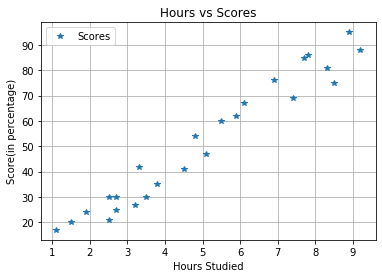

In [10]:
# Plotting the distribution of scores
Task2.plot(x='Hours', y='Scores', style='*')
plt.title('Hours vs Scores')  
plt.grid()
plt.xlabel('Hours Studied')  
plt.ylabel('Score(in percentage)') 

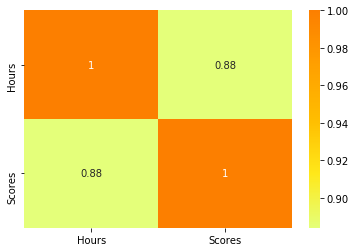

In [11]:
relation = Task2.corr(method = 'kendall')
sns.heatmap(relation, annot=True, cmap='Wistia')

In [12]:
X = Task2.iloc[:, :-1].values  
print(X)
Y = Task2.iloc[:, 1].values
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Splitting the data into Training and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


In [15]:
#fitting Simple Linear Regression to the training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print(regressor.intercept_)

2.018160041434683


In [17]:
print(regressor.coef_)

[9.91065648]


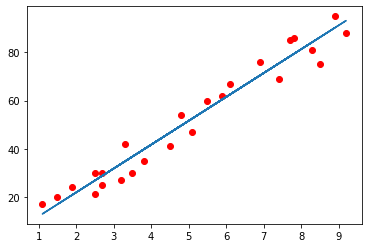

In [18]:
#Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the Test Data
plt.scatter(X,Y, color='red')
plt.plot(X, line);
plt.show()

# Predicting the Test data

In [19]:
y_Pred= regressor.predict(X_test)

In [20]:
df = pd.DataFrame({'Actual' : Y_test, 'Predicted' : y_Pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
#Predicton on other data
hours = [[9.25]]
pred= regressor.predict(hours)
print("Predicted Score: {}".format(pred[0]))

Predicted Score: 93.69173248737538


# Evaluation of the model

In [22]:
from sklearn import metrics
print('Mean Absolute Error', metrics.mean_absolute_error(Y_test, y_Pred))
print('Mean Squared Error', metrics.mean_squared_error(Y_test, y_Pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(Y_test, y_Pred)))

Mean Absolute Error 4.183859899002975
Mean Squared Error 21.5987693072174
Root Mean Squared Error 4.6474476121003665
